# LAB2

In [460]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import scipy as sp
from matplotlib import pyplot as plt

In [461]:
TEST = pd.read_csv("test_c.csv")
TRAIN = pd.read_csv("train_c.csv")

      ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  \
0          2010-06-26  27.0       66829.0        549.0     17290.0   
1          1996-09-23  55.0      172147.0        850.0     16110.0   
2          2015-01-19  51.0      300000.0        850.0     38436.0   
3          1981-05-12  25.0       34683.0        847.0     19186.0   
4          1995-05-07  55.0      300000.0        850.0     30437.0   
...               ...   ...           ...          ...         ...   
11010      1984-09-26  47.0       88686.0        648.0      5472.0   
11011      1980-01-15  39.0      300000.0        850.0      7721.0   
11012      2010-07-10  57.0      300000.0        850.0     14756.0   
11013      2003-10-22  28.0       15000.0        300.0     51361.0   
11014      1983-05-12  23.0       15000.0        302.0     30724.0   

       LoanDuration MaritalStatus  NumberOfDependents HomeOwnershipStatus  \
0              60.0      Divorced                 1.0                Rent   
1    

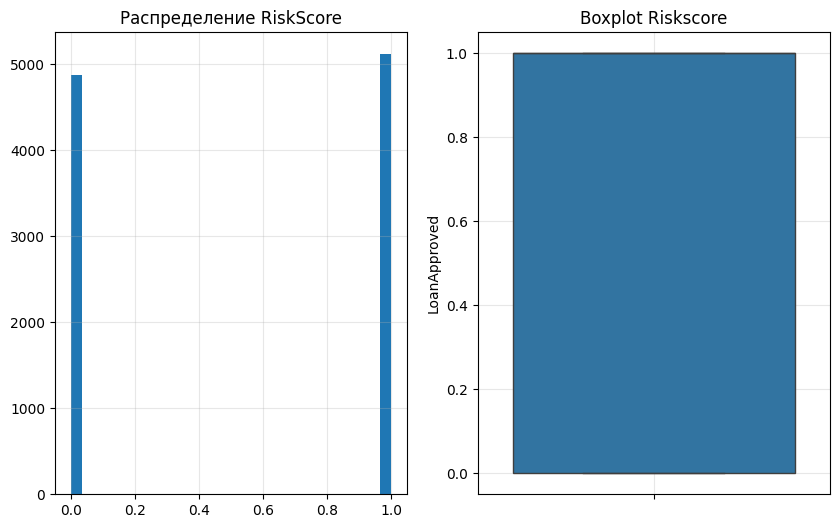

In [462]:
plt.figure(figsize=(10, 6))

df = TRAIN
df = df.dropna() # избавляемся от неполных данных
print(df)
print(df["MaritalStatus"].unique())
print(df["HomeOwnershipStatus"].unique())
print(df["LoanPurpose"].unique())
print(df["EmploymentStatus"].unique())
print(df["EducationLevel"].unique())
def visualise_df(df):
    plt.subplot(1, 2, 1)
    plt.hist(df['LoanApproved'], bins=30)
    plt.title('Распределение RiskScore')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    sns.boxplot(df['LoanApproved'])
    plt.title('Boxplot Riskscore')
    plt.grid(True, alpha=0.3)
    plt.show()

visualise_df(df)

/tmp/ipykernel_83033/3530327726.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["ApplicationDate"] = pd.to_datetime(X['ApplicationDate']).astype(int)


(9986, 46)
(9986, 46)


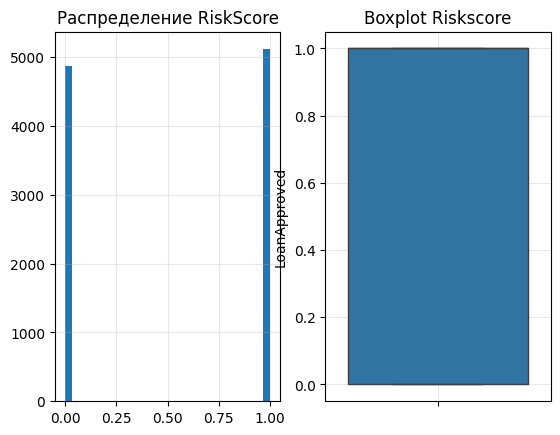

In [463]:
# для поиска выбросов будем использовать z-score
from scipy import stats


# Приведём данные к числовому виду

def transform_df(X):
    cols = ["MaritalStatus", "HomeOwnershipStatus", "LoanPurpose", "EmploymentStatus", "EducationLevel"]
    #df["ApplicationYear"] = pd.to_datetime(df["ApplicationDate"]).dt.year.astype(int)
    #df["ApplicationMonth"] = pd.to_datetime(df["ApplicationDate"]).dt.month.astype(int)
    #df["ApplicationQuarter"] = pd.to_datetime(df["ApplicationDate"]).dt.quarter.astype(int)
    #df = df.drop(columns="ApplicationDate")
    X["ApplicationDate"] = pd.to_datetime(X['ApplicationDate']).astype(int)
    if "MaritalStatus" in X.columns:
        X = pd.get_dummies(X, columns=['MaritalStatus'], prefix='Marital', drop_first=True, dtype=int)
    if "HomeOwnershipStatus" in X.columns:
        X = pd.get_dummies(X, columns=['HomeOwnershipStatus'], prefix='OWN', drop_first=True, dtype=int)
    if "LoanPurpose" in X.columns:
        X = pd.get_dummies(X, columns=['LoanPurpose'], prefix='PURP', drop_first=True, dtype=int)
    if "EmploymentStatus" in X.columns:
        X = pd.get_dummies(X, columns=['EmploymentStatus'], prefix='EMP', drop_first=True, dtype=int)
    if "EducationLevel" in X.columns:
        X = pd.get_dummies(X, columns=['EducationLevel'], prefix='EDU', drop_first=True, dtype=int)
    return X.drop(columns=cols, errors="ignore")



df = transform_df(df)
print(df.shape)
scores = np.abs(stats.zscore(df, axis=0))
mask = (scores < 3).all(axis=1)
df_clean = df[mask]
print(df.shape)
visualise_df(df)

Матрица корреляций Пирсона:
                            ApplicationDate       Age  AnnualIncome  \
ApplicationDate                    1.000000 -0.001260     -0.002075   
Age                               -0.001260  1.000000      0.037143   
AnnualIncome                      -0.002075  0.037143      1.000000   
CreditScore                        0.003691  0.055244      0.617242   
LoanAmount                         0.003882  0.007736      0.003327   
LoanDuration                      -0.003622  0.017256     -0.014502   
NumberOfDependents                -0.006534  0.017399     -0.002608   
MonthlyDebtPayments                0.022109 -0.013360      0.009249   
CreditCardUtilizationRate          0.020122  0.023141     -0.007774   
NumberOfOpenCreditLines            0.013862 -0.002153      0.000245   
NumberOfCreditInquiries            0.024625 -0.001954      0.014709   
DebtToIncomeRatio                 -0.018096 -0.004071      0.008111   
BankruptcyHistory                  0.009343  0.00

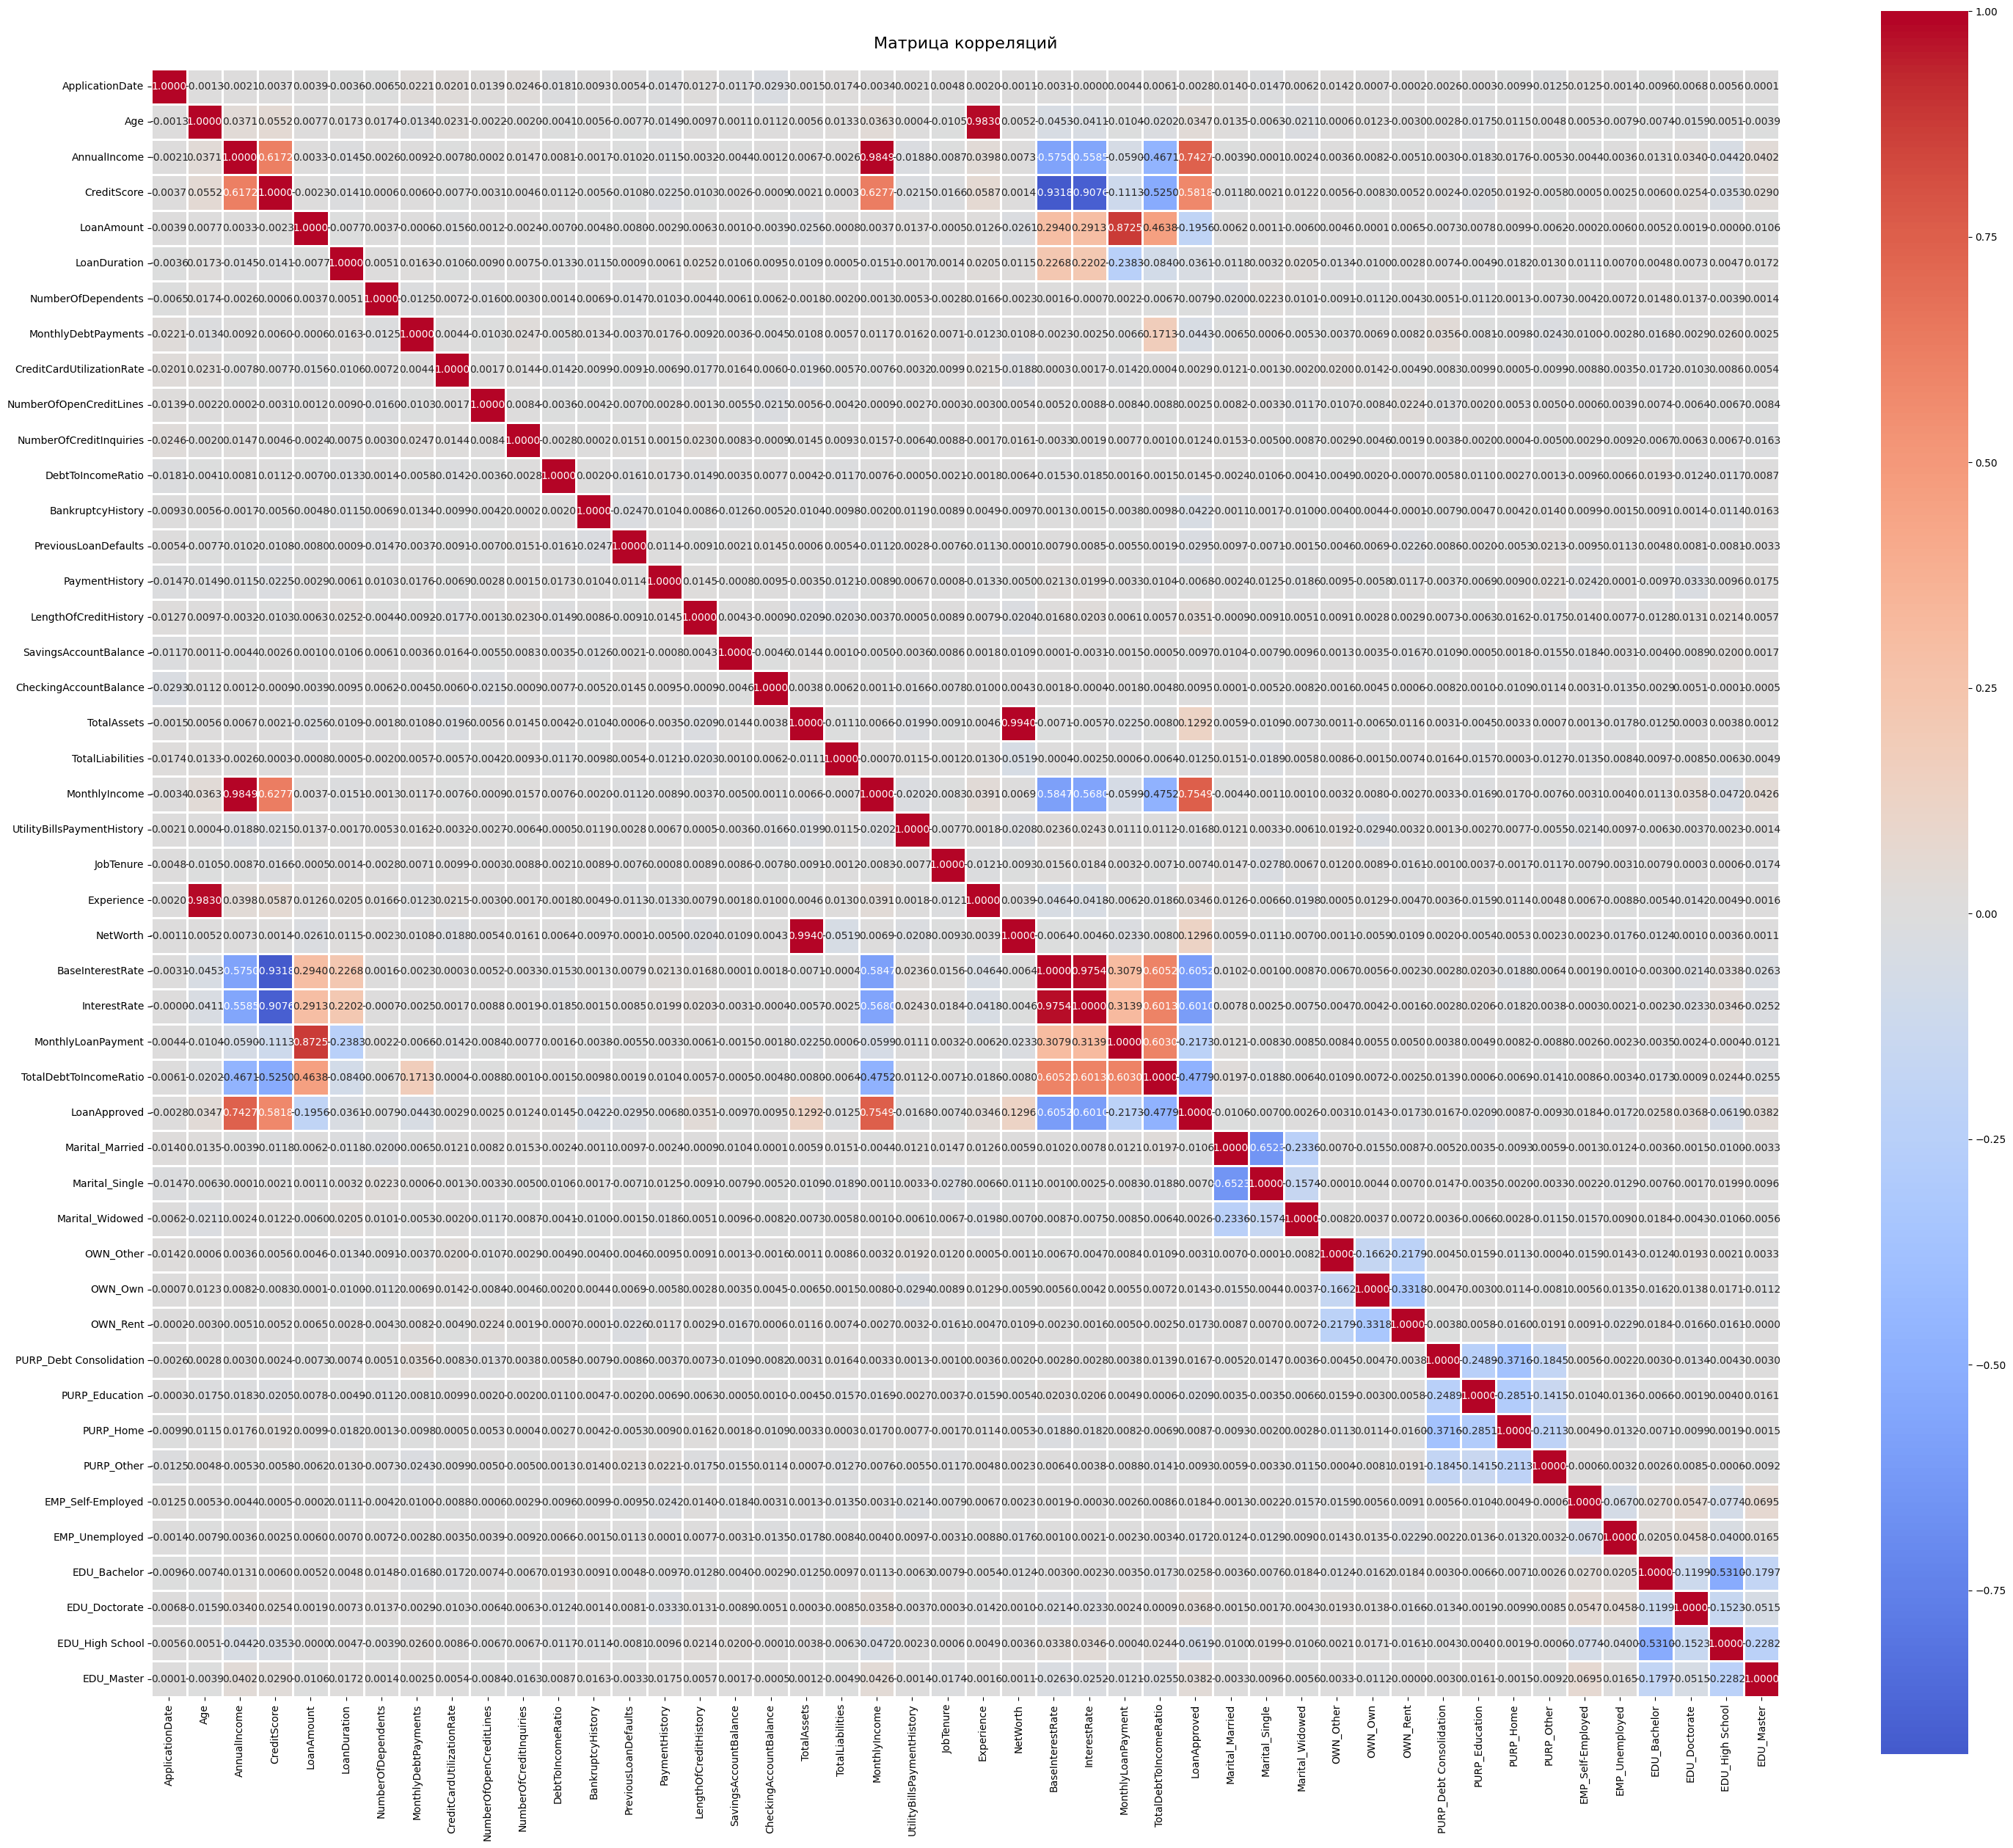

In [464]:
correlation_matrix = df.corr(method='pearson')
print("Матрица корреляций Пирсона:")
print(correlation_matrix)

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt='.4f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

### Реализации

In [477]:
def Accuracy(y_t, y_p):
    n = np.sum(y_t == y_p)
    return n / len(y_t)

def Precision(y_t, y_p):
    n = np.sum((y_t == 1) & (y_p == 1))
    q = np.sum((y_t == 1) & (y_p == 1)) + np.sum((y_t == 0) & (y_p == 1))
    return (n /q if q != 0 else 1)

def Recall(y_t, y_p):
    n = np.sum((y_t == 1) & (y_p == 1))
    q = np.sum((y_t == 1) & (y_p == 1)) + np.sum((y_t == 1) & (y_p == 0))
    return  (n / q if q != 0 else 1)

def HarmonicMean(y_t, y_p, B=1):
    p = Precision(y_t, y_p)
    r = Recall(y_t, y_p)
    return (1 + B) * (p * r) / ((B ** 2) * p + r)

def _tpr_fpr(y_t, y_p):
    y_t = np.array(y_t)
    y_p = np.array(y_p)
    
    tp = np.sum((y_p == 1) & (y_t == 1))
    fp = np.sum((y_p == 1) & (y_t == 0))
    fn = np.sum((y_p == 0) & (y_t == 1))
    tn = np.sum((y_p == 0) & (y_t == 0))

    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

    return tpr, fpr

def roc_curve(y_t, y_p):
    y_t = np.array(y_t)
    y_p = np.array(y_p)
    thresholds = np.unique(y_p)
    thresholds = np.sort(thresholds)[::-1]
    thresholds = np.concatenate([[np.max(y_p) + 1], thresholds, [np.min(y_p) - 1]])
    
    fpr_list, tpr_list = [], []

    for threshold in thresholds:
        tpr, fpr = _tpr_fpr(y_t, (y_p >= threshold).astype(int))
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    return fpr_list, tpr_list, thresholds

def AUC_ROC(y_t, y_p):
    fpr_list, tpr_list, _ = roc_curve(y_t, y_p)
    points = sorted(zip(fpr_list, tpr_list))
    fpr_sorted, tpr_sorted = zip(*points)
    area = 0.0
    for i in range(1, len(fpr_sorted)):
        width = fpr_sorted[i] - fpr_sorted[i-1]
        avg_height = (tpr_sorted[i] + tpr_sorted[i-1]) / 2
        area += width * avg_height
    return area

def pr_curve(y_t, y_p):
    y_t = np.array(y_t)
    y_p = np.array(y_p)
    thresholds = np.unique(y_p)
    thresholds = np.sort(thresholds)[::-1]
    thresholds = np.concatenate([[np.max(y_p) + 1], thresholds, [np.min(y_p) - 1]])
    
    p_list, r_list = [], []

    for threshold in thresholds:
        p, r = Precision(y_t, (y_p >= threshold).astype(int)), Recall(y_t, (y_p >= threshold).astype(int))
        p_list.append(p)
        r_list.append(r)
    
    return  p_list, r_list, thresholds

def AUC_PR(y_t, y_p):
    p_list, r_list,  _ = pr_curve(y_t, y_p)
    points = sorted(zip(r_list, p_list))
    r_sorted, p_sorted = zip(*points)
    area = 0.0
    for i in range(1, len(p_sorted)):
        width = r_sorted[i] - r_sorted[i-1]
        avg_height = (p_sorted[i] + p_sorted[i-1]) / 2
        area += width * avg_height
    return area

In [466]:
from sklearn.tree import DecisionTreeClassifier
    
class RandomForest:
    def __init__(self, n):
        self.n = n
        self.estim = DecisionTreeClassifier
        self.models = []
        self.features = []

    def fit(self, X, Y, params=None, max_features=np.sqrt,):
        params = ({} if params is None else params)
        self.models = []
        self.features = []
        n = self.n
        n_samples = X.shape[0]
        n_features = X.shape[1]
        for i in range(n):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            features = np.random.choice(
                n_features, 
                min(int(max_features(n_features)), n_features - 1), replace=False)
            Xb = X[indices]
            Xb = Xb[:, features]
            Yb = Y[indices]
            self.features.append(features)
            model = self.estim(**params)
            model.fit(Xb, Yb)
            self.models.append(model)

    def predict(self, X):
        predicts = []
        for i in range(len(self.models)):
            predicts.append(self.models[i].predict(X[:, self.features[i]]))
        predicts = np.array(predicts)
        ans = []
        for idx in range(X.shape[0]):
            votes = predicts[:, idx]
            unique, counts = np.unique(votes, return_counts=True)
            winner = unique[np.argmax(counts)]
            ans.append(winner)
        return np.array(ans)
    
    def predict_proba(self, X):
        all_probas = []
        for i in range(len(self.models)):
            X_subset = X[:, self.features[i]]
            tree_proba = self.models[i].predict_proba(X_subset)
            all_probas.append(tree_proba[:, 1])
        
        all_probas = np.array(all_probas)
        
        probas_mean = np.mean(all_probas, axis=0)
        
        return np.column_stack([1 - probas_mean, probas_mean])
    
class Bagging:
    def __init__(self, estimator, n):
        self.n = n
        self.estim = estimator
        self.models = []

    def fit(self, X, Y, params=None):
        params = ({} if params is None else params)
        self.models = []
        self.features = []
        n = self.n
        n_samples = X.shape[0]
        n_features = X.shape[1]
        for i in range(n):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            Xb = X[indices]
            Yb = Y[indices]
            model = self.estim(**params)
            model.fit(Xb, Yb)
            self.models.append(model)

    def predict(self, X):
        predicts = []
        for i in range(len(self.models)):
            predicts.append(self.models[i].predict(X))
        predicts = np.array(predicts)
        ans = []
        for idx in range(X.shape[0]):
            votes = predicts[:, idx]
            unique, counts = np.unique(votes, return_counts=True)
            winner = unique[np.argmax(counts)]
            ans.append(winner)
        return np.array(ans)
    
    def predict_proba(self, X):
        all_probas = []
        for i in range(len(self.models)):
            tree_proba = self.models[i].predict_proba(X)
            all_probas.append(tree_proba[:, 1])
        
        all_probas = np.array(all_probas)
        
        probas_mean = np.mean(all_probas, axis=0)
        
        return np.column_stack([1 - probas_mean, probas_mean])
    

In [467]:
from sklearn.tree import DecisionTreeRegressor
class GradientBoosting:
    def __init__(self, n=10, learning_rate=0.1, params=None):
        self.params = ({} if params is None else params)
        self.n = n
        self.alpha = learning_rate
        self.models = []
        self.weight = []
        self.init_value = 0.0

    @staticmethod
    def _sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        p0 = np.clip(y.mean(), 1e-6, 1 - 1e-6)
        self.init_value = np.log(p0 / (1 - p0))
        F = np.full(len(y), self.init_value)
        self.models = []
        for _ in range(self.n):
            p = self._sigmoid(F)
            grad = y - p                     
            hess = p * (1 - p)               
            hess = np.clip(hess, 1e-6, None)

            z = grad / hess

            tree = DecisionTreeRegressor(**self.params)
            tree.fit(X, z, sample_weight=hess)
            update = tree.predict(X)
            F += self.alpha * update
            self.models.append(tree)

        return self

    def predict_proba(self, X):
        X = np.asarray(X)
        F = np.full(X.shape[0], self.init_value)

        for k in range(1, self.n + 1):
            F += self.alpha * self.models[k - 1].predict(X)

        proba = self._sigmoid(F)
        return np.column_stack([1 - proba, proba])

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba >= 0.5).astype(int)

### Тесты моделей

In [468]:
# функция для создания новых фич
def featureExpander(X_O: pd.DataFrame,X: pd.DataFrame, Y, eps=0.5, enable_ratio=False, enable_poly=False):
    from scipy.stats import boxcox
    corrs = X_O.corrwith(Y).abs().sort_values(ascending=False)
    candidates = corrs[corrs > eps].index
    candidates = candidates
    print("Создаю признаки от", candidates)
    d = {}
    for i in range(len(candidates)):
        col = candidates[i]
        if df[col].min() > 0:
            d[f'EX{col}_bc'], lmd = boxcox(X[col].values)
        else:
            d[f'EX{col}_bc'], lmd = boxcox(X[col].values - X[col].min() + 1e-6)
        d[f'EX{col}_cb'] = X[col] ** 3
        d[f'EX{col}_inv'] = 1 / (X[col] + 1e-6)
        d[f'EX{col}_sq'] = X[col] ** 2
        d[f'EX{col}_sqrt'] = np.sqrt(np.abs(X[col]) + 1e-6)
        d[f'EX{col}_log'] = np.log(np.abs(X[col]) + 1e-6)

        if X_O[col].nunique() > 2:
            ln = np.linspace(X_O[col].min(), X_O[col].max(), 4)
            d[f'EX{col}_1'] = (X[col] < ln[1]) + 1
            d[f'EX{col}_2'] = ((X[col] >= ln[1]) & (X[col] < ln[2])) + 1
            d[f'EX{col}_3'] = (X[col] >= ln[3]) + 1
        for j in range(i+1, len(candidates)):
            a, b = col, candidates[j]
            d[f'EX{a}_plus_{b}'] = X[a] + X[b]
            if enable_ratio:
                d[f'EX{a}_div_{b}'] = X[a] / (X[b].abs() + 1e-6)
                d[f'EX{b}_div_{a}'] = X[b] / (X[a].abs() + 1e-6)

            if enable_poly:
                d[f'EX{a}_x_{b}_sqrt'] = np.sqrt(np.abs(X[a] * X[b]) + 1e-6)
                d[f'EX{a}_x_{b}_log'] = np.log(np.abs(X[a] * X[b]) + 1)
                d[f'EX{a}^2_x_{b}^2'] = ((X[a] ** 2) * (X[b] ** 2))
    newdf = pd.DataFrame(d, index=X.index)
    X = pd.concat([X, newdf], axis=1)
    return X

(9986, 46)
(7988, 45)
1
0.9746587999711069 0.9729066510429626


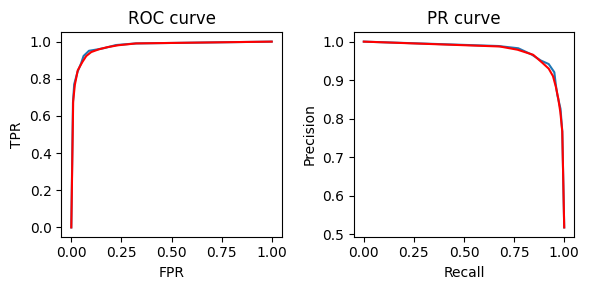

(5000, 45)
[0. 1.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5000 non-null   int64  
 1   LoanApproved  5000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 78.3 KB
None


In [469]:
import sklearn.model_selection as selection
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve as rc

print(df.shape)

target = "LoanApproved"
X = df.drop(columns=target)
Y = df[target]

xtr, xte, ytr, yte = train_test_split(X, Y, test_size=0.2, random_state=42)
xtr_ = xtr
print(xtr_.shape)
model1, model2 = Bagging(DecisionTreeClassifier, 10), BaggingClassifier(DecisionTreeClassifier(), 10)
l = [{"min_samples_split": 5, "min_samples_leaf": 3,},
     {"min_samples_split": 5, "min_samples_leaf": 2,},
     {"min_samples_split": 7, "min_samples_leaf": 3,},
     {"min_samples_split": 10, "min_samples_leaf": 5,},
     {"min_samples_split": 3, "min_samples_leaf": 3,},
     {"min_samples_split": 3, "min_samples_leaf": 2,},
     {"min_samples_split": 7, "min_samples_leaf": 5,}]
b = 0
e = None
for i in [(1)]:
    model1.fit(xtr_.values, ytr.values)
    model2.fit(xtr.values, ytr.values)
    yp1 = model1.predict(xte.values)
    pr1 = model1.predict_proba(xte.values)[:, 1]
    yp2 = model2.predict(xte.values)
    pr2 = model2.predict_proba(xte.values)[:, 1]
    print(i)
    print(AUC_ROC(yte, pr1), roc_auc_score(yte, pr2))
    if AUC_ROC(yte, pr1) > b:
        b = AUC_ROC(yte, pr1)
        e = i
    
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    fpr1, tpr1, _ = roc_curve(yte, pr1)
    fpr2, tpr2, _ = roc_curve(yte, pr2)
    axes[0].plot(fpr1, tpr1)
    axes[0].plot(fpr2, tpr2, c='red')
    axes[0].set_title('ROC curve')
    axes[0].set_xlabel('FPR')
    axes[0].set_ylabel('TPR')
    p1, r1, _ = pr_curve(yte, pr1)
    p2, r2, _ = pr_curve(yte, pr2)
    axes[1].plot(r1, p1)
    axes[1].plot(r2, p2, c='red')
    axes[1].set_title('PR curve')
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    plt.tight_layout()
    plt.show()
model1.fit(xtr_.values, ytr.values)
yp = model1.predict(xte.values)
pr = model1.predict_proba(xte.values)[:, 1]
# сохраняем Bagging
df_ = transform_df(TEST).drop(columns='ID')
print(df_.shape)
yf = model1.predict(df_.values)
print(np.unique(yf))
odf = pd.DataFrame({"ID": range(df_.shape[0]), target: yf})
print(odf.info())
odf.to_csv('BG.csv', index=False) 

(9986, 46)
(7988, 45)
{'min_samples_split': 5, 'min_samples_leaf': 3}
0.975080660047997 0.9750806600479948


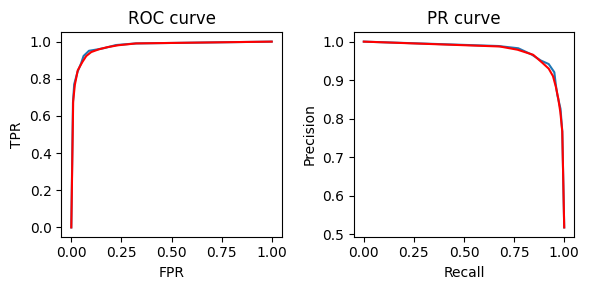

{'min_samples_split': 5, 'min_samples_leaf': 2}
0.9709197452587187 0.9709197452587142


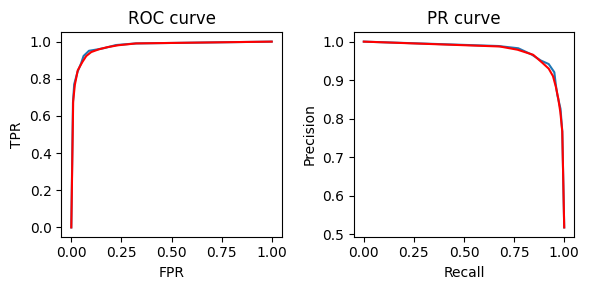

{'min_samples_split': 7, 'min_samples_leaf': 3}
0.9693200879636017 0.9693200879635946


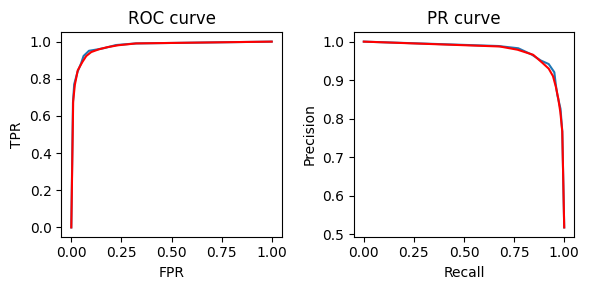

{'min_samples_split': 10, 'min_samples_leaf': 5}
0.9745258714094229 0.9745258714094239


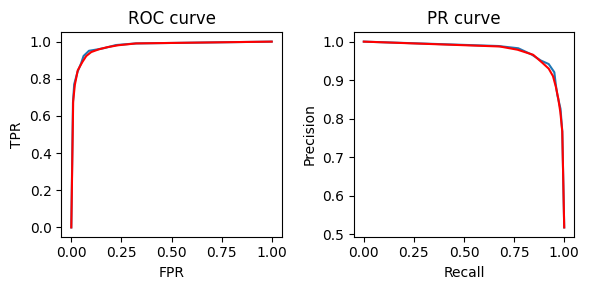

{'min_samples_split': 3, 'min_samples_leaf': 3}
0.974320208351727 0.974320208351726


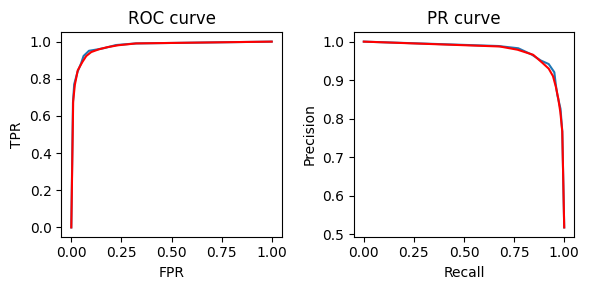

{'min_samples_split': 3, 'min_samples_leaf': 2}
0.9719144521938693 0.971914452193873


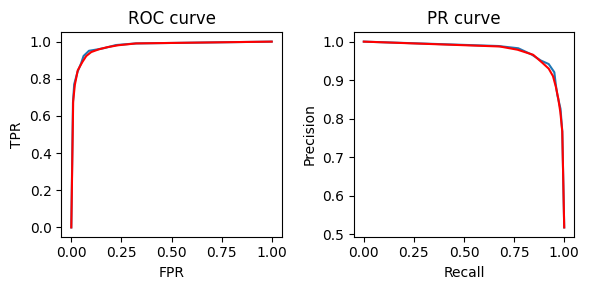

{'min_samples_split': 7, 'min_samples_leaf': 5}
0.9706042280311696 0.9706042280311725


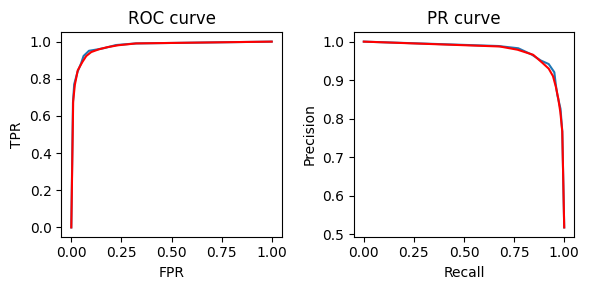

(5000, 45)
[0. 1.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5000 non-null   int64  
 1   LoanApproved  5000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 78.3 KB
None


In [470]:
#тест randomTree
import sklearn.model_selection as selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve as rc

print(df.shape)

target = "LoanApproved"
X = df.drop(columns=target)
Y = df[target]

xtr, xte, ytr, yte = train_test_split(X, Y, test_size=0.2, random_state=42)
xtr_ = xtr
print(xtr_.shape)
model = RandomForest(100)
l = [{"min_samples_split": 5, "min_samples_leaf": 3,},
     {"min_samples_split": 5, "min_samples_leaf": 2,},
     {"min_samples_split": 7, "min_samples_leaf": 3,},
     {"min_samples_split": 10, "min_samples_leaf": 5,},
     {"min_samples_split": 3, "min_samples_leaf": 3,},
     {"min_samples_split": 3, "min_samples_leaf": 2,},
     {"min_samples_split": 7, "min_samples_leaf": 5,}]
b = 0
e = None
for i in l:
    model.fit(xtr_.values, ytr.values, params=i)
    yp = model.predict(xte.values)
    pr = model.predict_proba(xte.values)[:, 1]
    print(i)
    print(AUC_ROC(yte, pr), roc_auc_score(yte, pr))
    if AUC_ROC(yte, pr) > b:
        b = AUC_ROC(yte, pr)
        e = i
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    fpr1, tpr1, _ = roc_curve(yte, pr1)
    fpr2, tpr2, _ = roc_curve(yte, pr2)
    axes[0].plot(fpr1, tpr1)
    axes[0].plot(fpr2, tpr2, c='red')
    axes[0].set_title('ROC curve')
    axes[0].set_xlabel('FPR')
    axes[0].set_ylabel('TPR')
    p1, r1, _ = pr_curve(yte, pr1)
    p2, r2, _ = pr_curve(yte, pr2)
    axes[1].plot(r1, p1)
    axes[1].plot(r2, p2, c='red')
    axes[1].set_title('PR curve')
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    plt.tight_layout()
    plt.show()
model.fit(xtr_.values, ytr.values, params=e)
yp = model.predict(xte.values)
pr = model.predict_proba(xte.values)[:, 1]
# сохраняем RandomForest
df_ = transform_df(TEST).drop(columns='ID')
print(df_.shape)
yf = model.predict(df_.values)
print(np.unique(yf))
odf = pd.DataFrame({"ID": range(df_.shape[0]), target: yf})
print(odf.info())
odf.to_csv('RF.csv', index=False) 


(9986, 46)
(7988, 45)
{'min_samples_split': 5, 'min_samples_leaf': 3}
0.981023820798258 0.9729066510429626


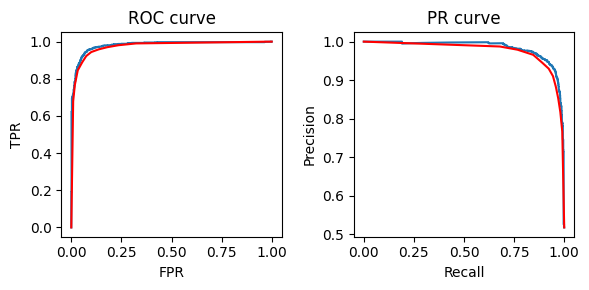

{'min_samples_split': 5, 'min_samples_leaf': 2}
0.9812345000280968 0.9729066510429626


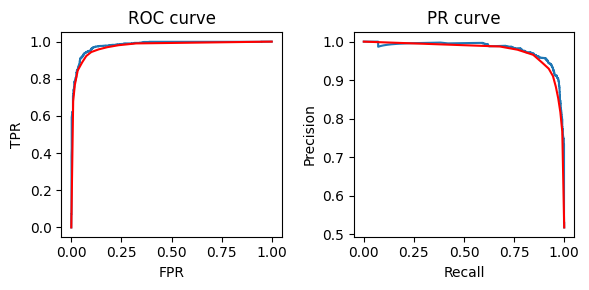

{'min_samples_split': 7, 'min_samples_leaf': 3}
0.9826089311941832 0.9729066510429626


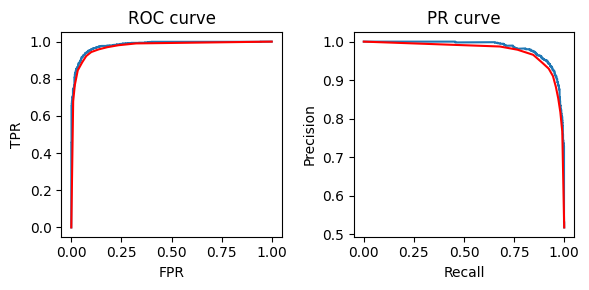

{'min_samples_split': 10, 'min_samples_leaf': 5}
0.9822477668001589 0.9729066510429626


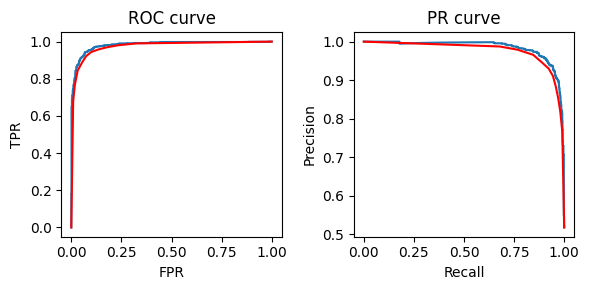

{'min_samples_split': 3, 'min_samples_leaf': 3}
0.9811943706509727 0.9729066510429626


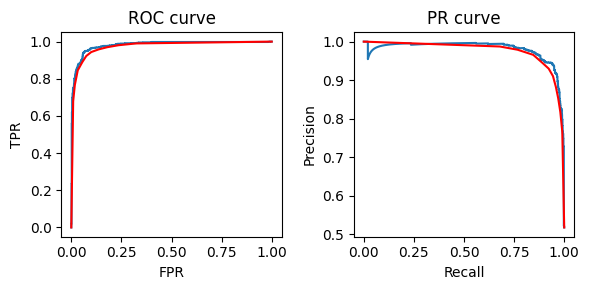

{'min_samples_split': 3, 'min_samples_leaf': 2}
0.979657917124813 0.9729066510429626


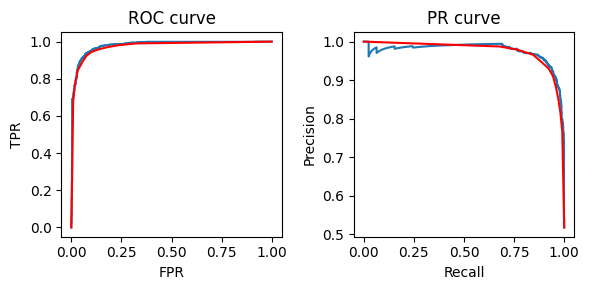

{'min_samples_split': 7, 'min_samples_leaf': 5}
0.9814742730563383 0.9729066510429626


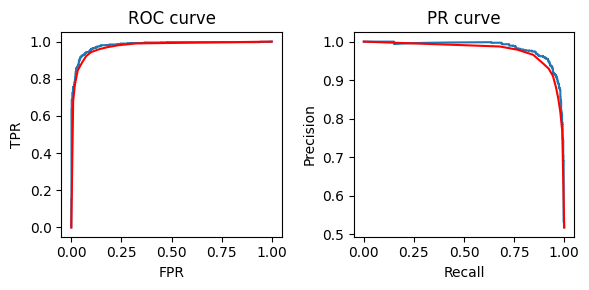

(5000, 45)
[0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            5000 non-null   int64
 1   LoanApproved  5000 non-null   int64
dtypes: int64(2)
memory usage: 78.3 KB
None


In [471]:
from sklearn.ensemble import GradientBoostingClassifier
print(df.shape)

target = "LoanApproved"
X = df.drop(columns=target)
Y = df[target]

xtr, xte, ytr, yte = train_test_split(X, Y, test_size=0.2, random_state=42)
xtr_ = xtr
print(xtr_.shape)
l = [{"min_samples_split": 5, "min_samples_leaf": 3,},
     {"min_samples_split": 5, "min_samples_leaf": 2,},
     {"min_samples_split": 7, "min_samples_leaf": 3,},
     {"min_samples_split": 10, "min_samples_leaf": 5,},
     {"min_samples_split": 3, "min_samples_leaf": 3,},
     {"min_samples_split": 3, "min_samples_leaf": 2,},
     {"min_samples_split": 7, "min_samples_leaf": 5,}]
b = 0
e = None
for i in l:
    model = GradientBoosting(50, params=i)
    model2 = GradientBoostingClassifier(n_estimators=50, **i)
    model.fit(xtr_.values, ytr.values)
    model2.fit(xtr_.values, ytr.values)
    yp = model.predict(xte.values)
    pr1 = model.predict_proba(xte.values)[:, 1]
    print(i)
    if AUC_ROC(yte, pr) > b:
        b = AUC_ROC(yte, pr)
        e = i
    yp = model2.predict(xte.values)
    pr = model2.predict_proba(xte.values)[:, 1]
    print(AUC_ROC(yte, pr1), AUC_ROC(yte, pr2))

    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    fpr1, tpr1, _ = roc_curve(yte, pr1)
    fpr2, tpr2, _ = roc_curve(yte, pr2)
    axes[0].plot(fpr1, tpr1)
    axes[0].plot(fpr2, tpr2, c='red')
    axes[0].set_title('ROC curve')
    axes[0].set_xlabel('FPR')
    axes[0].set_ylabel('TPR')
    p1, r1, _ = pr_curve(yte, pr1)
    p2, r2, _ = pr_curve(yte, pr2)
    axes[1].plot(r1, p1)
    axes[1].plot(r2, p2, c='red')
    axes[1].set_title('PR curve')
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    plt.tight_layout()
    plt.show()
model = GradientBoosting(50, params=e)
model.fit(xtr_.values, ytr.values)
yp = model.predict(xte.values)
pr = model.predict_proba(xte.values)[:, 1]
# сохраняем GradientBoosting
df_ = transform_df(TEST).drop(columns='ID')
print(df_.shape)
yf = model.predict(df_.values)
print(np.unique(yf))
odf = pd.DataFrame({"ID": range(df_.shape[0]), target: yf})
print(odf.info())
odf.to_csv('GB.csv', index=False) 


In [472]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

import optuna


def compare_boosting_models(X, y, test_size=0.2, random_state=42):
    """
    Обучает и сравнивает sklearn GB, LightGBM, XGBoost, CatBoost.
    Возвращает словарь с метриками ROC-AUC.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    results = {}

    # 1. Sklearn Gradient Boosting
    sk_model = GradientBoostingClassifier(random_state=random_state)
    sk_model.fit(X_train, y_train)
    y_pred = sk_model.predict_proba(X_test)[:, 1]
    results['sklearn_gb'] = roc_auc_score(y_test, y_pred)

    # 2. LightGBM
    lgb_model = lgb.LGBMClassifier(random_state=random_state)
    lgb_model.fit(X_train, y_train)
    y_pred = lgb_model.predict_proba(X_test)[:, 1]
    results['lightgbm'] = roc_auc_score(y_test, y_pred)

    # 3. XGBoost
    xgb_model = xgb.XGBClassifier(
        eval_metric='logloss',
        random_state=random_state,
        use_label_encoder=False
    )
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict_proba(X_test)[:, 1]
    results['xgboost'] = roc_auc_score(y_test, y_pred)

    # 4. CatBoost
    cb_model = CatBoostClassifier(
        verbose=0,
        random_state=random_state
    )
    cb_model.fit(X_train, y_train)
    y_pred = cb_model.predict_proba(X_test)[:, 1]
    results['catboost'] = roc_auc_score(y_test, y_pred)

    return results


def tune_best(X, y, n_trials=30, random_state=42):
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    def objective(trial):
        params = {
            'iterations': trial.suggest_int('iterations', 200, 800),
            'depth': trial.suggest_int('depth', 4, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
            'loss_function': 'Logloss',
            'eval_metric': 'AUC',
            'verbose': 0,
            'random_seed': random_state
        }

        model = CatBoostClassifier(**params)
        model.fit(X_train, y_train)

        y_pred = model.predict_proba(X_valid)[:, 1]
        return roc_auc_score(y_valid, y_pred)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    return study.best_params, study.best_value


target = "LoanApproved"
X = df.drop(columns=target)
Y = df[target]
scores = compare_boosting_models(X, Y)
print(scores)
best_params, best_auc = tune_best(X, Y)
print(best_params, best_auc)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4082, number of negative: 3906
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4851
[LightGBM] [Info] Number of data points in the train set: 7988, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511017 -> initscore=0.044073
[LightGBM] [Info] Start training from score 0.044073


/home/egor/.local/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [22:09:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-12-14 22:09:44,267] A new study created in memory with name: no-name-f809fd77-07e7-4bf7-857c-3748d79ccbda


{'sklearn_gb': 0.9844930054495694, 'lightgbm': 0.9848551730780034, 'xgboost': 0.9850387649782899, 'catboost': 0.9869368845156786}


[I 2025-12-14 22:10:02,600] Trial 0 finished with value: 0.9859557212452947 and parameters: {'iterations': 778, 'depth': 10, 'learning_rate': 0.1946960581862248, 'l2_leaf_reg': 9.286553086626254}. Best is trial 0 with value: 0.9859557212452947.
[I 2025-12-14 22:10:04,245] Trial 1 finished with value: 0.9858704463189321 and parameters: {'iterations': 634, 'depth': 5, 'learning_rate': 0.29213617588233715, 'l2_leaf_reg': 6.372292640348101}. Best is trial 0 with value: 0.9859557212452947.
[I 2025-12-14 22:10:04,813] Trial 2 finished with value: 0.9858273072385372 and parameters: {'iterations': 274, 'depth': 4, 'learning_rate': 0.2886023441746869, 'l2_leaf_reg': 9.344709335246545}. Best is trial 0 with value: 0.9859557212452947.
[I 2025-12-14 22:10:09,675] Trial 3 finished with value: 0.9860460123437963 and parameters: {'iterations': 362, 'depth': 9, 'learning_rate': 0.03637379157304848, 'l2_leaf_reg': 3.2369450552008665}. Best is trial 3 with value: 0.9860460123437963.
[I 2025-12-14 22:10:

{'iterations': 531, 'depth': 5, 'learning_rate': 0.06250231517582083, 'l2_leaf_reg': 3.5803807553268254} 0.986836561072899


(9986, 46)
(7988, 45)
0:	learn: 0.6207349	total: 12.3ms	remaining: 6.5s
1:	learn: 0.5556651	total: 20.6ms	remaining: 5.44s
2:	learn: 0.5097741	total: 23.7ms	remaining: 4.17s
3:	learn: 0.4625259	total: 26.7ms	remaining: 3.52s
4:	learn: 0.4188838	total: 29.6ms	remaining: 3.12s
5:	learn: 0.3934667	total: 32.7ms	remaining: 2.86s
6:	learn: 0.3709211	total: 35.6ms	remaining: 2.66s
7:	learn: 0.3391588	total: 38.1ms	remaining: 2.49s
8:	learn: 0.3193669	total: 41ms	remaining: 2.38s
9:	learn: 0.3041335	total: 45.1ms	remaining: 2.35s
10:	learn: 0.2897004	total: 51.8ms	remaining: 2.45s
11:	learn: 0.2789492	total: 57.8ms	remaining: 2.5s
12:	learn: 0.2690068	total: 63.8ms	remaining: 2.54s
13:	learn: 0.2584000	total: 66.9ms	remaining: 2.47s
14:	learn: 0.2508819	total: 69.6ms	remaining: 2.39s
15:	learn: 0.2450003	total: 73ms	remaining: 2.35s
16:	learn: 0.2403707	total: 76ms	remaining: 2.3s
17:	learn: 0.2361171	total: 79.1ms	remaining: 2.25s
18:	learn: 0.2302848	total: 81.8ms	remaining: 2.2s
19:	learn:

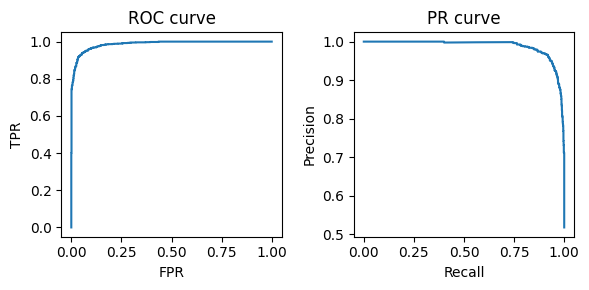

(5000, 45)
[0. 1.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5000 non-null   int64  
 1   LoanApproved  5000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 78.3 KB
None


In [473]:

print(df.shape)

target = "LoanApproved"
X = df.drop(columns=target)
Y = df[target]

xtr, xte, ytr, yte = train_test_split(X, Y, test_size=0.2, random_state=42)
xtr_ = xtr
print(xtr_.shape)
model = CatBoostClassifier(**best_params)
model.fit(xtr_.values, ytr.values)
yp = model.predict(xte.values)
pr1 = model.predict_proba(xte.values)[:, 1]
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
fpr1, tpr1, _ = roc_curve(yte, pr1)
axes[0].plot(fpr1, tpr1)
axes[0].set_title('ROC curve')
axes[0].set_xlabel('FPR')
axes[0].set_ylabel('TPR')
p1, r1, _ = pr_curve(yte, pr1)
axes[1].plot(r1, p1)
axes[1].set_title('PR curve')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
plt.tight_layout()
plt.show()
yp = model.predict(xte.values)
pr = model.predict_proba(xte.values)[:, 1]
# сохраняям catboost
df_ = transform_df(TEST).drop(columns='ID')
print(df_.shape)
yf = model.predict(df_.values)
print(np.unique(yf))
odf = pd.DataFrame({"ID": range(df_.shape[0]), target: yf})
print(odf.info())
odf.to_csv('CB.csv', index=False) 

In [478]:
# Сравним метрики
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, auc, average_precision_score
print(Accuracy(yte, yp), accuracy_score(yte, yp))
print(Precision(yte, yp), precision_score(yte, yp))
print(Recall(yte, yp), recall_score(yte, yp))
print(HarmonicMean(yte, yp), f1_score(yte, yp))
print(AUC_ROC(yte, pr), roc_auc_score(yte, pr))
print(AUC_PR(yte, pr), average_precision_score(yte, pr))

0.9394394394394394 0.9394394394394394
0.9427740058195926 0.9427740058195926
0.9400386847195358 0.9400386847195358
0.9414043583535108 0.9414043583535109
0.986688082377586 0.9866880823775853
0.9879392486275309 0.9881221878610364
